### Problem Statement

### The client is an Indian multinational healthcare group. Along with the eponymous hospital chain, the company also operates pharmacies, primary care and diagnostic centres, telehealth clinics, and digital healthcare services among others through its subsidiaries

### The goal of this analysis is to highlight the factors that play an important role in determining the hospitalization charges, viral load etc. for a patient. This helps in faster assessments of infection spread and better predict need for financial help.

In [65]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import kstest

In [2]:
# Importing the dataset and creating a Pandas Dataframe
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv')

In [3]:
# Printing the first 5 rows of the Dataframe
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


### 1. Exploratory Data Analysis

### 1.1 Primary Analysis

In [8]:
# Shape of the dataset
df.shape

(1338, 8)

In [9]:
# Summary of columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [11]:
# Dropping unwanted columns
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [12]:
# Statistical Summary
df.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [13]:
df.nunique()

age                          47
sex                           2
smoker                        2
region                        4
viral load                  462
severity level                6
hospitalization charges    1320
dtype: int64

### 1. The dataset has 1338 rows and 8 columns
### 2. 4 columns are of integer data type, 1 of float data type and 3 of object datatype
### 3. There are no missing values in any of the columns
### 4. The statistical analysis gives the following insights
###     4.1 The mean age of the patients in the dataset is 39 years with 75% of the sample below 52 years
###     4.2 The mean viral load of the patients in 10.22 and the maximum values is 17.71
###     4.3 75% of the patients had a severity level below 2 with the ranges being from 0 to 5
###     4.4 The average hospitalization charges is Rs 33176. The maximum amount charged was Rs 159426 indicating a possibility of outliers in the columns
### 5. Sex, Smoker, Region and Severity level are categorical variables

### 1.2 Univariate Analysis

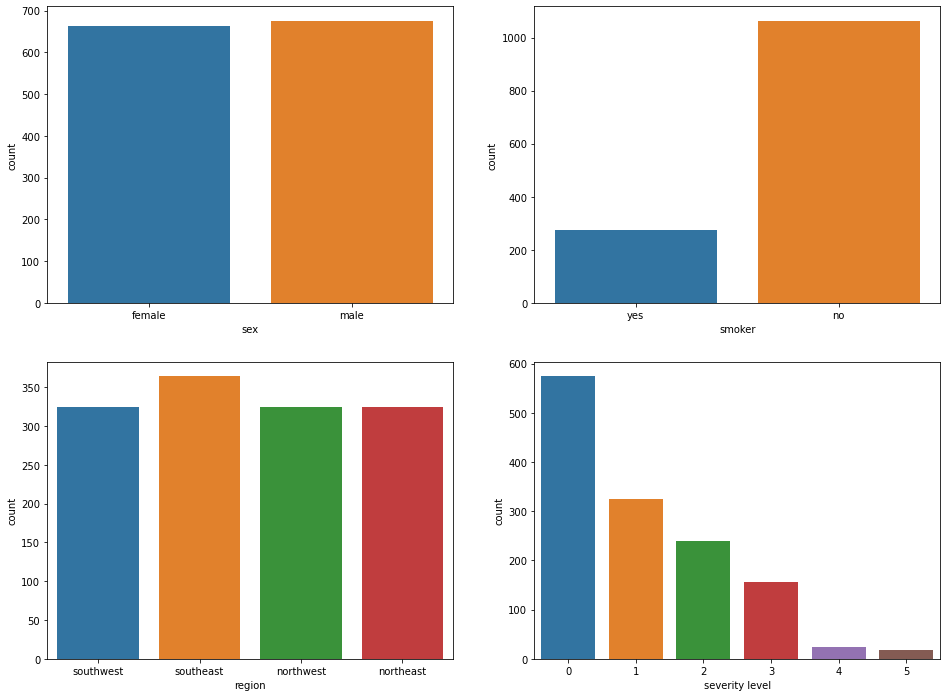

In [15]:
# Countplots for all categorical variables
fig,axis=plt.subplots(nrows=2,ncols=2,figsize=(16,12))
cols=['sex','smoker','region','severity level']
index=0
for i in range(2):
    for j in range(2):
        sns.countplot(data=df,x=df[cols[index]],ax=axis[i,j])
        index+=1
plt.show()

### 1. The dataset includes a slightly more number of males than females.
### 2. The number of non smokers is significantly higher than smokers
### 3. The southeast region has more number of patients with the remaining almost equally split across the other regions
### 4. There are very few patients with high severity levels of 4 and 5

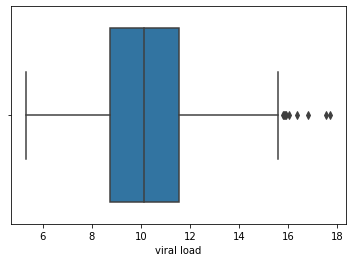

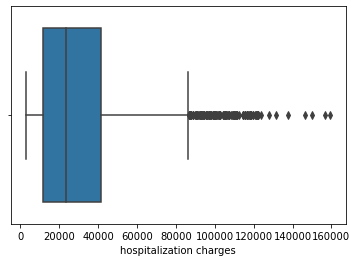

In [31]:
# Boxplots for all categorical variables
cols=['viral load','hospitalization charges']
index=0
for i in cols:
        sns.boxplot(data=df,x=df[cols[index]])
        index+=1
        plt.show()

### There are outliers in both viral load and hospitalization charges

<AxesSubplot:xlabel='age', ylabel='Count'>

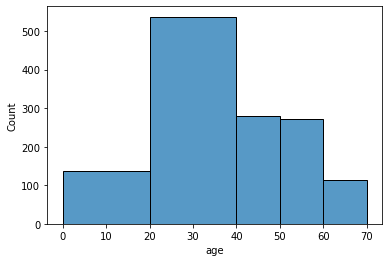

In [36]:
sns.histplot(data=df,x=df['age'],bins=[0,20,40,50,60,70])

### Most patients are in the age range between 20-40. There are fewer children and senior citizens

### 1.3. Bivariate Analysis

### 1. Age vs Other factors

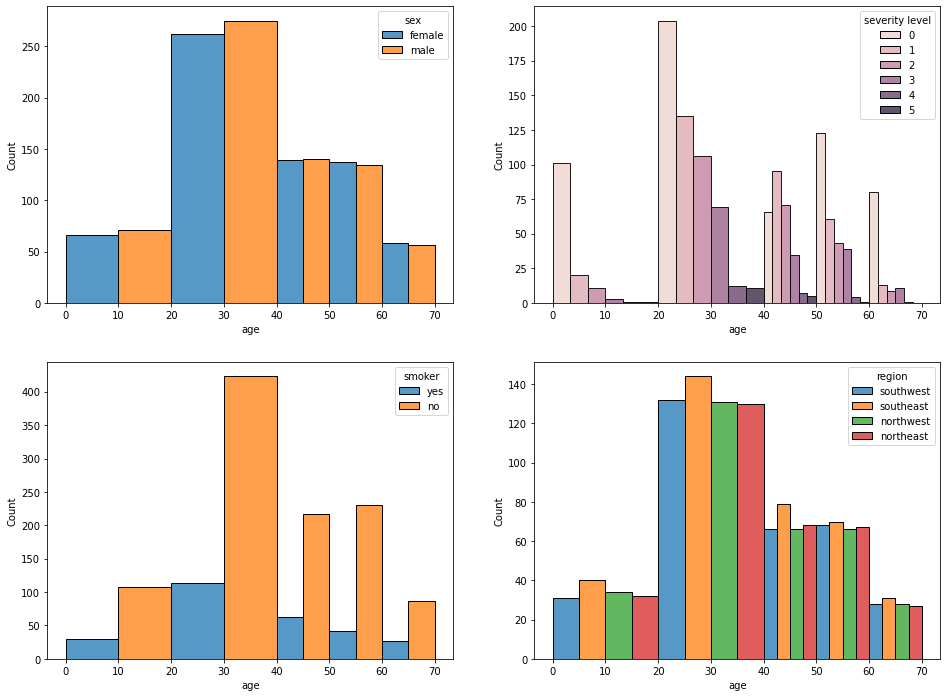

In [38]:
# Countplots for comparing age with other categorical factors
fig,axis=plt.subplots(nrows=2,ncols=2,figsize=(16,12))
cols=['sex','severity level','smoker','region']
index=0
for i in range(2):
    for j in range(2):
        sns.histplot(data=df,hue=df[cols[index]],x=df['age'],ax=axis[i,j],bins=[0,20,40,50,60,70],multiple='dodge')
        index+=1
plt.show()

### The patients in age group 40 - 50 seem to have a slightly higher severity level. The other patterns are consistent across age groups as seen in the univariate analysis.

### 2. Sex vs Other factors

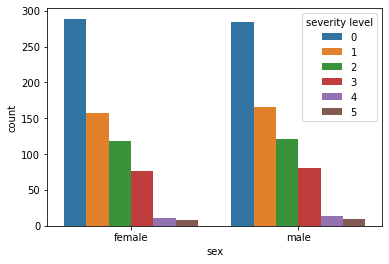

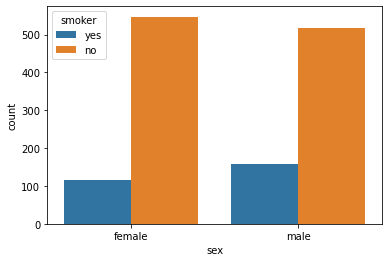

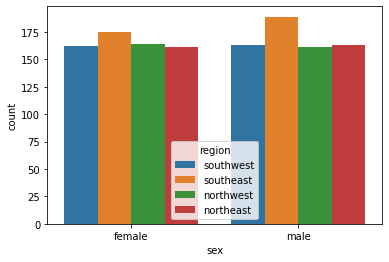

In [50]:
# Countplots for comparing sex with other categorical factors
cols=['severity level','smoker','region']
for i in cols:
        sns.countplot(data=df,hue=df[i],x=df['sex'],dodge=True)
        plt.show()

### The patterns are consistent across males and females as seen in the univariate analysis.

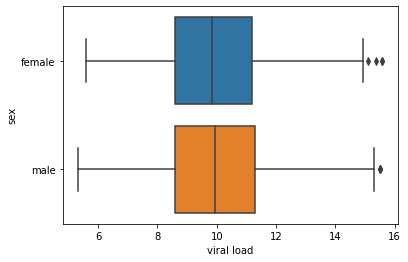

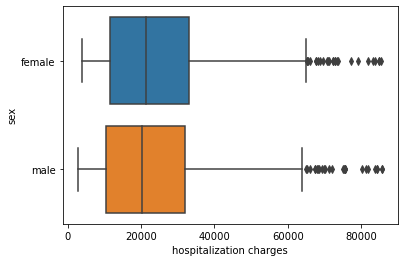

In [96]:
# Countplots for comparing sex with other continous factors
cols=['viral load','hospitalization charges']
for i in cols:
        sns.boxplot(data=df,x=df[i],y=df['sex'])
        plt.show()

### The median viral load is slightly higher for males 
### The median hospitalization charges are almost similar for both males and females

### 3. Severity level vs Other factors

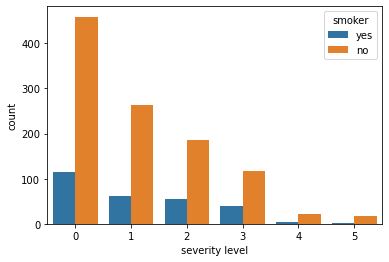

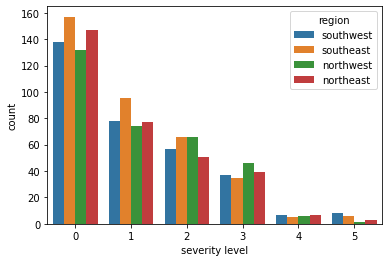

In [51]:
# Countplots for comparing severity level with other categorical factors
cols=['smoker','region']
for i in cols:
        sns.countplot(data=df,hue=df[i],x=df['severity level'],dodge=True)
        plt.show()

### The patterns are consistent across severity levels as seen in the univariate analysis.

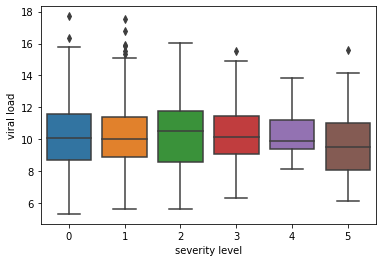

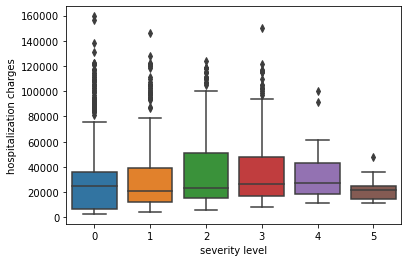

In [54]:
# Countplots for comparing severity level with other continous factors
cols=['viral load','hospitalization charges']
for i in cols:
        sns.boxplot(data=df,y=df[i],x=df['severity level'])
        plt.show()

### The viral load is highest for severity level 2. Hospitalization charges are highest for severity level 4 followed by 0 and 3

### 4. Smoker vs Other factors

<AxesSubplot:xlabel='smoker', ylabel='count'>

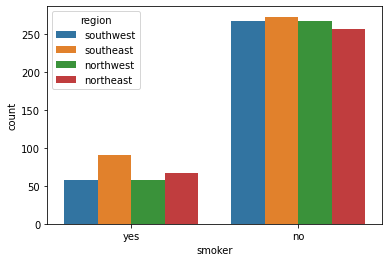

In [55]:
# Countplots for comparing smoker with other categorical factors
sns.countplot(data=df,hue=df['region'],x=df['smoker'],dodge=True)

### The patterns of smoking are similar across regions

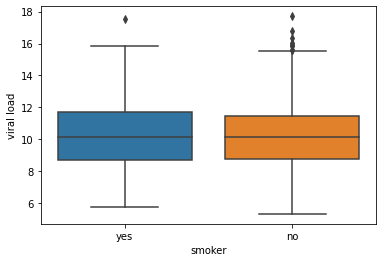

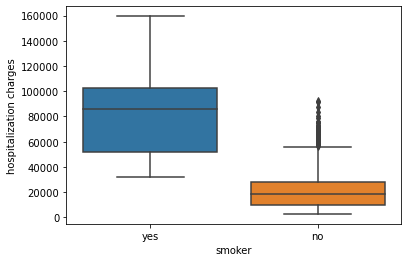

In [56]:
# Countplots for comparing smoker with other continous factors
cols=['viral load','hospitalization charges']
for i in cols:
        sns.boxplot(data=df,y=df[i],x=df['smoker'])
        plt.show()

### The viral load is almost similar across both smokers and non smokers.
### The hospitalization charges are significantly higher for smokers than non smokers

### 5. Correlation across continous variables

<AxesSubplot:>

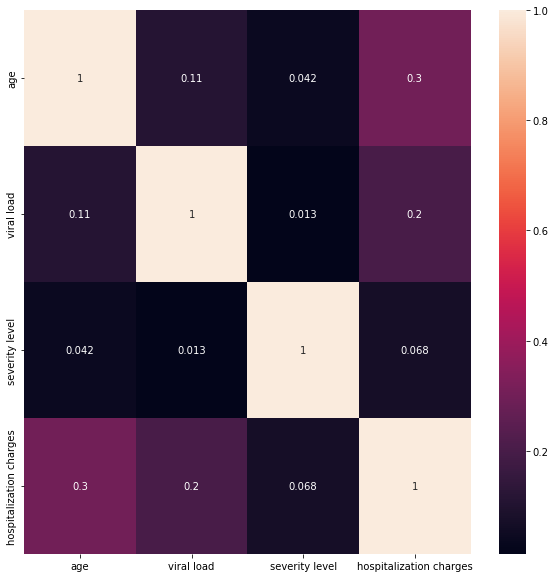

In [57]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### We dont observe any major correlation between the continous variables apart from a weak positive correlation between age and hospitalization charges

### 1.5 Insights based on EDA

#### 1. The dataset includes a slightly more number of males than females.
#### 2. The number of non smokers is significantly higher than smokers
#### 3. The southeast region has more number of patients with the remaining almost equally split across the other regions
#### 4. There are very few patients with high severity levels of 4 and 5
#### 5. There are outliers in both viral load and hospitalization charges
#### 6. Most patients are in the age range between 20-40. There are fewer children and senior citizens
#### 7. The patients in age group 40 - 50 seem to have a slightly higher severity level. The other patterns are consistent across age groups as seen in the univariate analysis.
#### 8. The median viral load is slightly higher for males 
#### 9. The median hospitalization charges are almost similar for both males and females
#### 10. The viral load is highest for severity level 2. Hospitalization charges are highest for severity level 4 followed by 0 and 3
#### 11. The viral load is almost similar across both smokers and non smokers.
#### 12. The hospitalization charges are significantly higher for smokers than non smokers
#### 13. We dont observe any major correlation between the continous variables apart from a weak positive correlation between age and hospitalization charges

### 2. Missing Values and Outlier Treatment

In [59]:
# Checking for missing values in each column
df.isna().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

### There are no missing values in any column of the dataset

In [60]:
# Handling outliers using IQR Method
cols=['viral load','hospitalization charges']
for i in cols:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    df=df[(df[i]>(q1-1.5*IQR)) & (df[i]<(q3+1.5*IQR))]

In [62]:
# Checking updated statistics
df.describe()

,age,viral load,severity level,hospitalization charges
count,1191.000000,1191.000000,1191.000000,1191.000000
mean,39.010915,9.997960,1.087322,24752.761545
std,14.056634,1.956954,1.216455,17968.444708
min,18.000000,5.320000,0.000000,2805.000000
25%,26.000000,8.600000,0.000000,11022.000000
50%,39.000000,9.900000,1.000000,20868.000000
75%,51.000000,11.260000,2.000000,32384.000000
max,64.000000,15.580000,5.000000,85758.000000


### 3. Hypothesis testing

### 3.1 Testing if hospitalization charges of people who do smoking are greater than those who don't

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

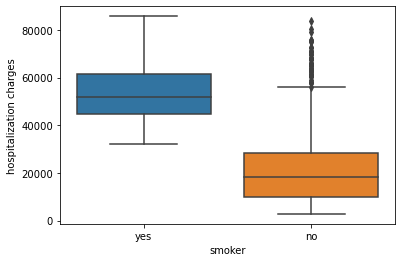

In [64]:
# 1. Visual Analysis
sns.boxplot(data=df,y=df['hospitalization charges'],x=df['smoker'])

### The hospitalization charges of smokers seems to be considerably higher than non smokers

#### 2. Hypothesis Formulation
#### H0 : The mean Hospitalization charges is same for both smokers and non smokers
#### Ha : The mean Hospitalization charges for smokers is higher than non smokers

#### 3. Select the appropriate test
#### We are comparing a categorical variable(Smoker) against a continous variable(Hospitalization Charges) and we have sample data
#### So we will be using the 2 sample right tailed T-Test in this case

#### 4. Check Test assumptions
####   1. Data values are independent - True for this dataset
####   2. Data is obtained from a random sample in the population - True for this dataset
####   3. Data values are continous - Hospitalization charges is continous

In [67]:
# Check Test Assumptions
# 4. Data is normally distributed
# Since sample size is higher we will use KS test to check for normality
#H0: Both the samples have similar distribution
#Ha: Both the samples dont have similar distribution
    
hosp_smoker=df[df['smoker']=='yes']['hospitalization charges']
hosp_nonsmoker=df[df['smoker']=='no']['hospitalization charges']
ks_stat,p_value=kstest(hosp_smoker,hosp_nonsmoker)
print(ks_stat,p_value)

0.8814887092277669 1.645756625594092e-111


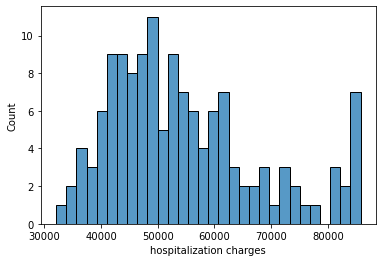

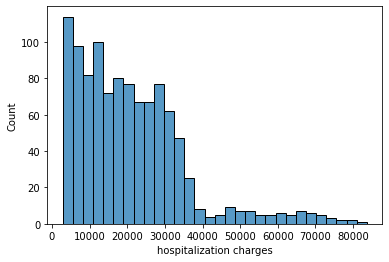

In [95]:
sns.histplot(hosp_smoker,bins=30)
plt.show()

sns.histplot(hosp_nonsmoker,bins=30)
plt.show()

### Since p value is lower than 0.05, we reject the null hypothesis and conclude that both the samples do not have similar distribution.

### From the Histogram, we can observe that the smoker group has a considerably normal distribution and non smokers have a skewed distribution.

### Hence we assume approximate similarity of both distributions

In [72]:
# 5. Finding p value at 95% confidence with a significance value of 0.05
t_stat,p_value=ttest_ind(hosp_smoker,hosp_nonsmoker,alternative='greater')
print(t_stat)
print(p_value)

25.60770019385774
7.626446732206901e-116


In [73]:
# 6. Conclusion based on the p value
alpha=0.05
if p_value< alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


### Based on the 2 sample T-Test, we reject the null hypothesis. So we can confirm that hospitalization charges for smokers are greater than non smokers

### 3.2 Testing that the viral load of females is different from that of males

<AxesSubplot:xlabel='viral load', ylabel='sex'>

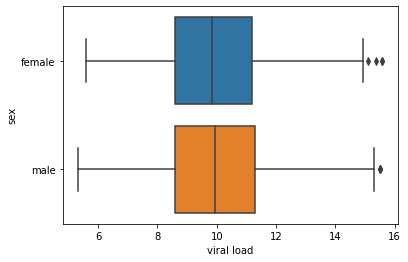

In [79]:
# 1. Visual Analysis
sns.boxplot(data=df,y=df['sex'],x=df['viral load'])

### The viral load of females and males are almost similar

#### 2. Hypothesis Formulation
#### H0 : The mean viral load is same for both females and males
#### Ha : The mean viral load is different for both females and males

#### 3. Select the appropriate test
#### We are comparing a categorical variable(Sex) against a continous variable(Viral Load) and we have sample data
#### So we will be using the 2 sample two tailed T-Test in this case

#### 4. Check Test assumptions
####   1. Data values are independent - True for this dataset
####   2. Data is obtained from a random sample in the population - True for this dataset
####   3. Data values are continous - Viral load is continous

In [80]:
# Check Test Assumptions
# 4. Data is normally distributed
# Since sample size is higher we will use KS test to check for normality
#H0: Both the samples have similar distribution
#Ha: Both the samples dont have similar distribution
    
viral_male=df[df['sex']=='male']['viral load']
viral_female=df[df['sex']=='female']['viral load']
ks_stat,p_value=kstest(viral_male,viral_female)
print(ks_stat,p_value)

0.03224513980982478 0.9022732675989341


### Since p value is higher than 0.05, we fail to reject the null hypothesis and conclude that both the samples have similar distribution

In [81]:
# 5. Finding p value at 95% confidence with a significance value of 0.05
t_stat,p_value=ttest_ind(viral_male,viral_female)
print(t_stat)
print(p_value)

0.5675665685649349
0.5704364600211779


In [82]:
# 6. Conclusion based on the p value
alpha=0.05
if p_value< alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Fail to reject H0


### Based on the 2 sample T-Test, we fail to reject the null hypothesis. So we can confirm that viral load is similar for both males and females

### 3.3 Testing that proportion of smoking significantly different across different regions

<AxesSubplot:xlabel='smoker', ylabel='count'>

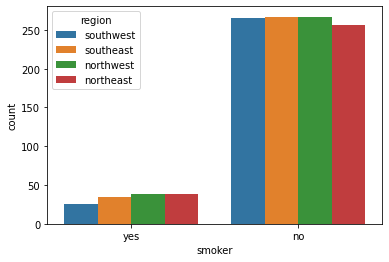

In [75]:
# 1. Visual Analysis
sns.countplot(data=df,hue=df['region'],x=df['smoker'])

### The proportion of smokers and non smokers seem to be similar across regions

#### 2. Hypothesis Formulation
#### H0 : The proportion of smokers is similar across regions
#### Ha : The proportion of smokers is different across regions

#### 3. Select the appropriate test
#### We are comparing a categorical variable(Smoker) against another categorical variable(Region)
#### So we will be using the Chi Square 2 tailed test in this case

#### 4. Check Test assumptions
####   1. Data values are categorical - True for smoker and region columns in this dataset
####   2. Observations are independent - True for this data
####   3. Each cell is mutually exclusive - True for this data

In [76]:
# Check Test Assumptions
# 4. Expected value in each cell is greater than 5
smoker_region=pd.crosstab(index=df['smoker'],columns=df['region'])
smoker_region

region,northeast,northwest,southeast,southwest
smoker,,,,
no,256,267,267,265
yes,39,38,34,25


#### From the frequency table, we can see that number of values is greater than 5 for all cells

In [77]:
# 5. Finding p value at 95% confidence with a significance value of 0.05
chi_stat,p_value,dof,expected=chi2_contingency(smoker_region)
print(chi_stat)
print(p_value)
print(dof)
print(expected)

3.5220357595425753
0.31791538258247287
3
[[261.31402183 270.17212427 266.62888329 256.88497061]
 [ 33.68597817  34.82787573  34.37111671  33.11502939]]


In [78]:
# 6. Conclusion based on the p value
alpha=0.05
if p_value< alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Fail to reject H0


### Based on the Chisquare test, we fail to reject the null hypothesis. So we can confirm that the proportion of smokers is similar across regions

### 3.4 Testing if mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level are the same

<AxesSubplot:xlabel='severity level', ylabel='viral load'>

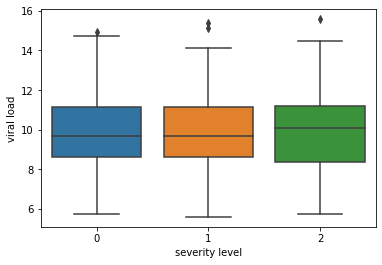

In [87]:
# 1. Visual Analysis
df_test=df[(df['sex']=='female') & (df['severity level']<=2)]
sns.boxplot(data=df_test,x=df_test['severity level'],y=df_test['viral load'])

### The viral load of females with severity level 2 seems slightly higher than other levels

#### 2. Hypothesis Formulation
#### H0 : The viral load for females is same for all severity levels equal to or less than 2
#### Ha : The viral load for females is not same for all severity levels equal to or less than 2

#### 3. Select the appropriate test
#### We are comparing a categorical variable(severity level) with more than 2 categories against a continous variable(viral load)
#### So we will be using the one way two tailed ANOVA Test in this case

#### 4. Check Test assumptions
####   1. Data values are independent - True for this dataset

In [88]:
# Check Test Assumptions
# 4. Data is normally distributed
# Since sample size is higher we will use KS test to check for normality
#H0: All the samples have similar distribution
#Ha: All the samples dont have similar distribution
    
df_test_0=df_test[df_test['severity level']==0]['viral load']
df_test_1=df_test[df_test['severity level']==1]['viral load']
df_test_2=df_test[df_test['severity level']==2]['viral load']
ks_stat,p_value=kstest(df_test_0,df_test_1,df_test_2)
print(ks_stat,p_value)

0.045715301045791454 0.9817448767754021


### Since p value is higher than 0.05, we fail to reject the null hypothesis and conclude that all the samples have similar distribution

In [92]:
# 5. Finding p value at 95% confidence with a significance value of 0.05
f_stat,p_value=f_oneway(df_test_0,df_test_1,df_test_2)
print(f_stat)
print(p_value)

0.03636576075249481
0.9642899920667247


In [90]:
# 6. Conclusion based on the p value
alpha=0.05
if p_value< alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Fail to reject H0


### Based on the ANOVA test, we fail to reject the null hypothesis. So we can confirm that for females, the mean viral load is similar for severity levels less than or equal to 2